# Analysis of Anscombe's Quartet Dataset

### Introduction

Visualization of a dataset might not provide accurate values as statistics do, but it helps in understanding the behaviour of the dataset or population much better than the numerical methods do. In the past, statisticians used to believe that usage of graphs is not ideal in statistics, as numerical calculations only can find accurate solutions.

Francis Anscombe published a paper titled Graphs in Statistical Analysis in the year 1973. This paper was published to demonstrate the usefulness of the graphs in statistical analysis.

### Graphs in Statistical Analysis

In this paper, Francis Anscombe states "Graphs are essential to good statistical analysis". He suggests that the computer should perform both numerical calculations and graphical analysis and outcome from both methods should be studied to understand the data.
He then illustrated some of the points explained in paper with the help of a table of numbers. The table contains a set of 4 data sets, hence called by the name Anscombe's Quartet. These numbers seems to have similar statistical properties, each consisting of eleven (x,y) points. Francis created this dataset to demonstrate how graphing the data can help in analysis of dataset and its importance in understanding the statistical properties.

#### Anscombe's Quartet Dataset

The below figure shows the Anscombe's dataset from the Graphs in Statistical Analysis. The first three datasets in the below table have different dependant variable y values against one independant x variable value.

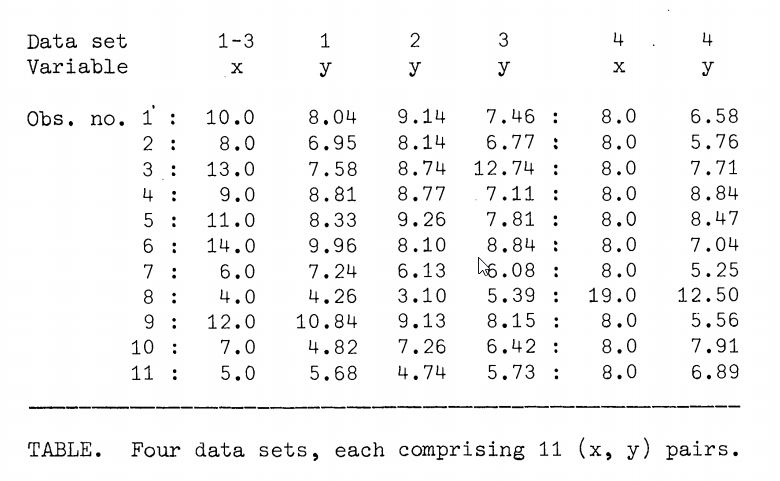

The numerical analysis of the above 11 observations produced same standard output across the four datasets.

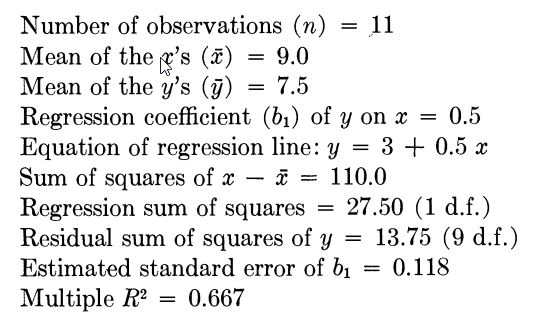

The below code generatesa table showing the result of various numerical operations performed on the Anscombe's quartet dataset.

In [50]:
import seaborn as sbn
import dateutil as dl
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_markdown as dm
import pandas as pd
from IPython.display import HTML, display
import scipy as scp
from scipy.stats import linregress

dtset = sbn.load_dataset("anscombe")
dset = dtset.dataset.unique()

#group the dtset by 'dataset' column and aggregate it by mean, variance, standard devaiation etc
aggregatedSet = dtset.groupby('dataset').agg([np.mean, np.var, np.std, np.min, np.max])
organisedSet = aggregatedSet.transpose()


pd.DataFrame(organisedSet, columns=organisedSet.columns)
#print(agg1)

# Show the results of a linear regression within each dataset


dataset          I         II        III         IV
x mean    9.000000   9.000000   9.000000   9.000000
  var    11.000000  11.000000  11.000000  11.000000
  std     3.316625   3.316625   3.316625   3.316625
  amin    4.000000   4.000000   4.000000   8.000000
  amax   14.000000  14.000000  14.000000  19.000000
y mean    7.500909   7.500909   7.500000   7.500909
  var     4.127269   4.127629   4.122620   4.123249
  std     2.031568   2.031657   2.030424   2.030579
  amin    4.260000   3.100000   5.390000   5.250000
  amax   10.840000   9.260000  12.740000  12.500000

In [83]:
for sets in dset:
    dataLoc = dtset.loc[dtset.dataset == sets]
    globals()['x%s' % sets] = dataLoc.x.unique()
    globals()['y%s' % sets] = dataLoc.y.unique()
# unable to read xIV from dataset as unique while taking distinct shows two values only    
xIV = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]   
slope1, intercept1, r_val1, p_val1, std_err1 = linregress(xI, yI)
slope2, intercept2, r_val2, p_val2, std_err2 = linregress(xII, yII)
slope3, intercept3, r_val3, p_val3, std_err3 = linregress(xIII, yIII)
slope4, intercept4, r_val4, p_val4, std_err4 = linregress(xIV, yIV)
print("    Slope Intercept r_value p_val std_err")
print("I   {0:.3f}   {1:.2f}     {2:.3f}  {3:.3f}  {4:.3f}".format(slope1, intercept1, r_val1, p_val1, std_err1))
print("II  {0:.3f}   {1:.2f}     {2:.3f}  {3:.3f}  {4:.3f}".format(slope2, intercept2, r_val2, p_val2, std_err2))
print("III {0:.3f}   {1:.2f}     {2:.3f}  {3:.3f}  {4:.3f}".format(slope3, intercept3, r_val3, p_val3, std_err3))
print("IV  {0:.3f}   {1:.2f}     {2:.3f}  {3:.3f}  {4:.3f}".format(slope4, intercept4, r_val4, p_val4, std_err4))

    Slope Intercept r_value p_val std_err
I   0.500   3.00     0.816  0.002  0.118
II  0.500   3.00     0.816  0.002  0.118
III 0.500   3.00     0.816  0.002  0.118
IV  0.500   3.00     0.817  0.002  0.118


from the above numerical calculations, all the four datasets are identical. Mean, variance, standard deviance, slope, intercept for x and y across all datasets seems to be identical.
The x,y values from all the four datasets are now plotted below to have the visual representation of the data.

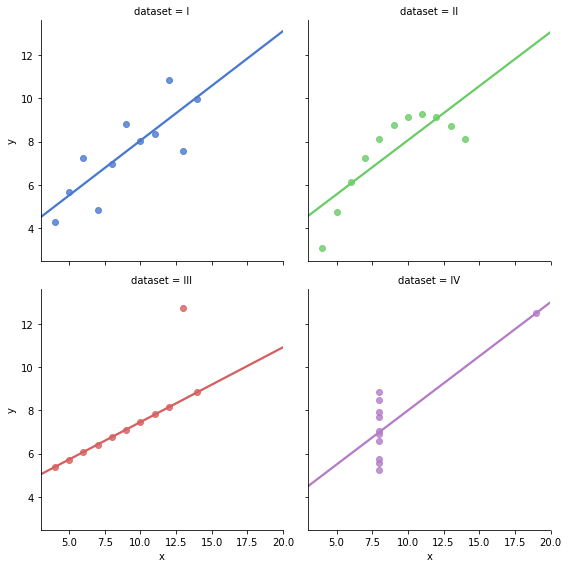

In [21]:
sbn.lmplot(x="x", y="y", col="dataset", hue="dataset",palette="muted", data=dtset,
           col_wrap=2,  size=4, robust=True, ci=None)
plt.show()

### Conclusion:
From the analysis of the numerical calculation and graphical analysis of the datasets, its proven that the garphical representation of the data is essential to understand the dataset completely.

### References
http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf
https://en.wikipedia.org/wiki/Anscombe%27s_quartet
https://www.oreilly.com/library/view/python-data-analysis/9781785282287/ch02s02.html
https://gist.github.com/endolith/3299951
http://methodmatters.blogspot.com/2018/01/anscombes-quartet-1980s-edition.html
https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.transpose.html
https://www.safaribooksonline.com/library/view/python-data-analysis/9781785282287/ch02s02.html
https://seaborn.pydata.org/examples/anscombes_quartet.html
https://data.world/vikjam/anscombes-quartet/workspace/file?filename=plot-quartet.ipynb
https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html
https://pythonhosted.org/dautil/report.html
https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html
https://seaborn.pydata.org/generated/seaborn.lmplot.html
